In [18]:
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from submm.KIDs import resonance_fitting as res_fit
from submm.sample_data.abs_paths import abs_path_sample_data

# Single Resonator Fitting
## Load the Sample Data

In [19]:
data_path = os.path.join(abs_path_sample_data,
                         "Survey_Tbb20.000K_Tbath170mK_Pow-60dBm_array_temp_sweep_long.mat")
sample_data = loadmat(data_path)

## Extract the Frequency and Complex S21
From a VNA trace of the sample data

In [20]:
freq_ghz = sample_data['f'][:, 0]
freq_mhz = freq_ghz * 1.0e3
freq_hz = freq_ghz * 1.0e9
s21_complex = sample_data['z'][:, 0]
s21_mag = 20 * np.log10(np.abs(s21_complex))

## Plot the sample data

Text(0, 0.5, 'Magnitude (dB)')

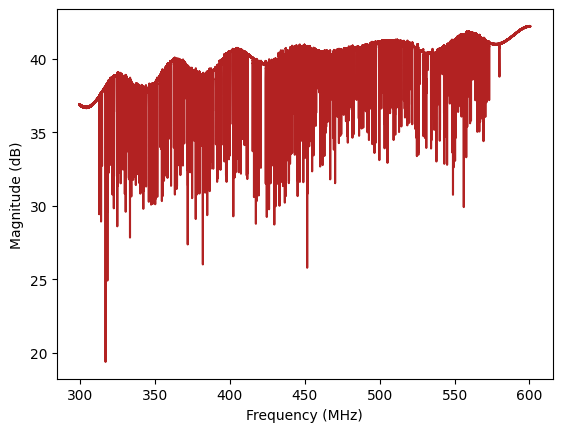

In [21]:
plt.figure()
plt.plot(freq_mhz, s21_mag, color='firebrick')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude (dB)')

## Select a single resonator and plot

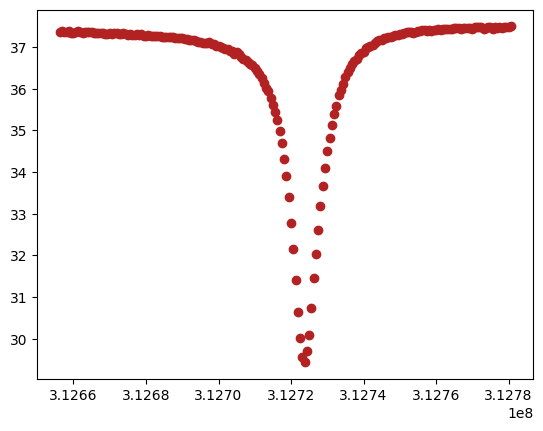

In [22]:
freq_hz_res1 = freq_hz[21050: 21250]
freq_mhz_res1 = freq_hz[21050: 21250]
s21_complex_res1 = s21_complex[21050: 21250]
s21_mag_res1 = s21_mag[21050: 21250]
plt.figure()
plt.plot(freq_mhz_res1, s21_mag_res1, color='firebrick', ls='None', marker='o')

## Run the fitter and get the results dictionary

In [23]:
results = res_fit.fit_nonlinear_iq(freq_hz_res1, s21_complex_res1)

default bounds used
default initial guess used
fr guess  = 312.72 MHz
Q guess   = 14.38 kHz, 21754.7
amp guess = 0.61
i0 guess  = 64.41
q0 guess  = -38.29
tau guess = 0.03 x 10^-7
[312723750.0, 21754.695652173912, 0.606277493898265, 0, 0, 64.40646362304688, -38.29212951660156, 3.0000000000000004e-09, 312723750.0]


## Calculate Quality Factors
1/Q = 1/Qi + 1/Qc
=> 1/Qi = 1/Q - 1/Qc
=> Qi = 1/(1/Q-1/Qc)

In [24]:
quality_factor = results['fit'][0][1]
quality_factor_coupling = quality_factor / results['fit'][0][2]
quality_factor_intrinsic = 1.0 / ((1.0 / quality_factor) - (1.0 / quality_factor_coupling))

## Plot the resonator fit results
### Complex

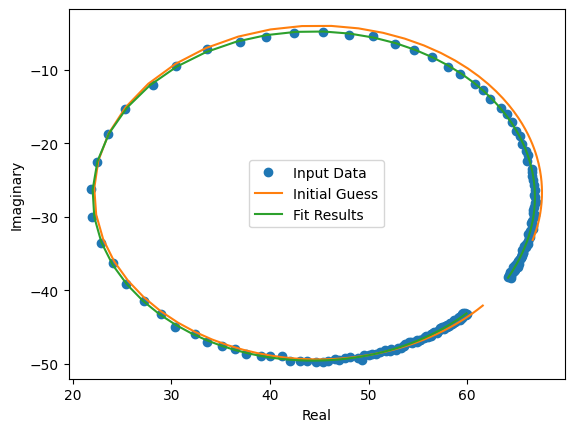

In [25]:
plt.figure()
plt.plot(np.real(s21_complex_res1), np.imag(s21_complex_res1),'o',label = "Input Data")
plt.plot(np.real(results['x0_result']),np.imag(results['x0_result']),label = "Initial Guess")
plt.plot(np.real(results['fit_result']),np.imag(results['fit_result']),label = "Fit Results")
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

### Magnitude

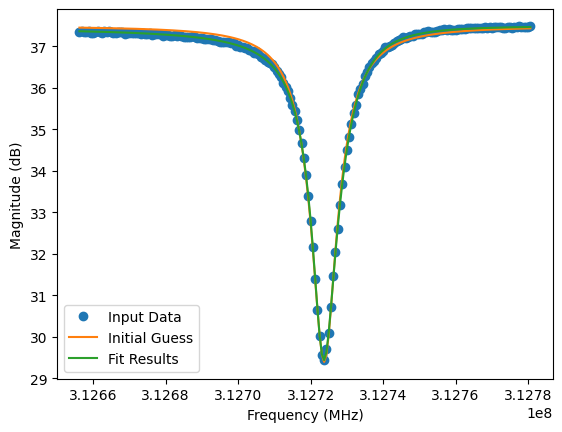

In [26]:
plt.figure()
plt.plot(freq_mhz_res1, s21_mag_res1, 'o', label="Input Data")
plt.plot(freq_mhz_res1,20*np.log10(results['x0_result']),label="Initial Guess")
plt.plot(freq_mhz_res1,20*np.log10(results['fit_result']),label = "Fit Results")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude (dB)')
plt.legend()